<a href="https://colab.research.google.com/github/vongkhmer/KNOWHOW/blob/master/complex_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [6]:
#Let's try the most simple 
#sequential model

X = np.random.rand(123, 128, 128, 3)
Y = np.random.choice(a=[0,1], size=(123,))
print(X.shape)
print(Y.shape)

simple_model = tf.keras.models.Sequential()
simple_model.add(tf.keras.layers.Conv2D(16, [3,3], activation="relu", input_shape=[128,128,3]))
simple_model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=[3,3], strides=(1,1), activation="relu"))
simple_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
simple_model.add(tf.keras.layers.Flatten())
simple_model.add(tf.keras.layers.Dense(128, activation="relu"))
simple_model.add(tf.keras.layers.Dense(1, activation="sigmoid"))
simple_model.summary()
simple_model.compile(loss=tf.keras.losses.binary_crossentropy, optimizer='rmsprop',  metrics=['accuracy'])

(123, 128, 128, 3)
(123,)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 126, 126, 16)      448       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 124, 124, 16)      2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 61504)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               7872640   
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 7,875,537
Trainable params: 7,875,537
Non-trainable params: 0
__________________

In [8]:
simple_model_history = simple_model.fit(X, Y, batch_size=32, epochs=5, verbose = 1)

Epoch 1/5
4/4 [==============================] - 0s 28ms/step - loss: 4.0248e-09 - accuracy: 1.0000
Epoch 2/5
4/4 [==============================] - 0s 27ms/step - loss: 4.1248e-09 - accuracy: 1.0000
Epoch 3/5
4/4 [==============================] - 0s 25ms/step - loss: 4.2349e-09 - accuracy: 1.0000
Epoch 4/5
4/4 [==============================] - 0s 25ms/step - loss: 4.3215e-09 - accuracy: 1.0000
Epoch 5/5
4/4 [==============================] - 0s 23ms/step - loss: 4.4409e-09 - accuracy: 1.0000


In [43]:
tf.keras.utils.plot_model(simple_model, show_shapes=True, rankdir="LR")

NameError: ignored

In [26]:
#let's continue to a little bit inside of keras functional API
img_input = tf.keras.Input(shape=(28,28,1))
x = tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), strides=(1,1), activation='relu')(img_input)
x = tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1,1),  activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(3,3))(x)
x = tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), activation='relu')(x)
x = tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), strides=(1,1),  activation='relu')(x)
encoder_output = tf.keras.layers.GlobalAveragePooling2D()(x)

encoder_model = tf.keras.Model(img_input, encoder_output, name="encoder-v")

decoder_input = tf.keras.Input(shape=(16))
x = tf.keras.layers.Reshape(target_shape=(4,4,1))(decoder_input)
x = tf.keras.layers.Conv2DTranspose(filters=16, kernel_size=(3,3), activation="relu")(x)
x = tf.keras.layers.Conv2DTranspose(filters=32, kernel_size=(3,3), activation="relu")(x)
x = tf.keras.layers.UpSampling2D(size=(3,3))(x)
x = tf.keras.layers.Conv2DTranspose(filters=16, kernel_size=(3,3), activation="relu")(x)
decoder_output = tf.keras.layers.Conv2DTranspose(filters=1, kernel_size=(3,3), activation="relu")(x)

decoder_model = tf.keras.Model(decoder_input, decoder_output, name="decoder-v")

x = encoder_model(img_input)
x = decoder_model(x)

autoencoder_model = tf.keras.Model(img_input, x)

In [27]:
encoder_model.summary()
print("=====================")
decoder_model.summary()
autoencoder_model.summary()

Model: "encoder-v"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_23 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 6, 6, 32)          9248      
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 4, 4, 16)          4624      
_________________________________________________________________
global_average_pooling2d_15  (None, 16)                0 

In [38]:
#now moving on complex topology

def get_dummy_model(input_shape):
  input_tensor = tf.keras.Input(shape=input_shape)
  x = tf.keras.layers.Dense(units=128, activation="relu")(input_tensor)
  x = tf.keras.layers.Dense(units=1, activation="sigmoid")(x)
  return tf.keras.Model(input_tensor, x)
input_shape = (12,12,1)
model_1 = get_dummy_model(input_shape)
model_2 = get_dummy_model(input_shape)
model_3 = get_dummy_model(input_shape)

x = tf.keras.Input(input_shape)
y1 = model_1(x)
y2 = model_2(x)
y3 = model_3(x)

y = tf.keras.layers.average([y1, y2, y3])

average_decision_model = tf.keras.Model(x, y, name="average-decision-model")

In [39]:
average_decision_model.summary()

Model: "average-decision-model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_49 (InputLayer)           [(None, 12, 12, 1)]  0                                            
__________________________________________________________________________________________________
model_2 (Model)                 (None, 12, 12, 1)    385         input_49[0][0]                   
__________________________________________________________________________________________________
model_3 (Model)                 (None, 12, 12, 1)    385         input_49[0][0]                   
__________________________________________________________________________________________________
model_4 (Model)                 (None, 12, 12, 1)    385         input_49[0][0]                   
_____________________________________________________________________________

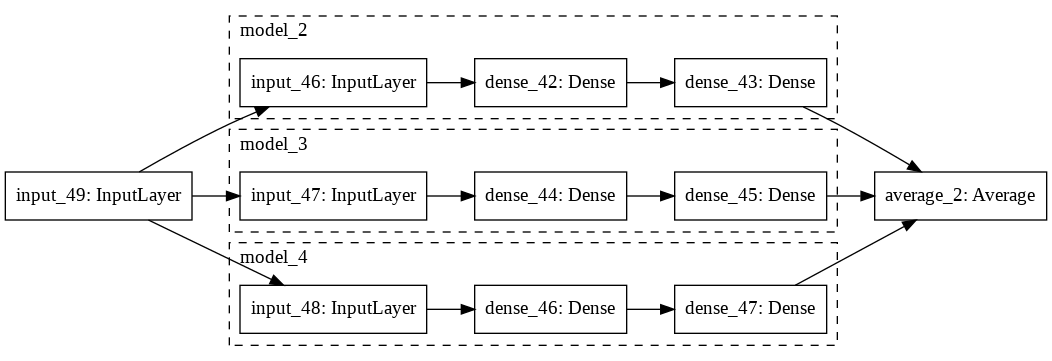

In [44]:
tf.keras.utils.plot_model(average_decision_model, expand_nested=True, rankdir="LR")

In [58]:
def make_3_layers(input_tensor):
  x = tf.keras.layers.Dense(units=32, activation="relu")(input_tensor)
  x = tf.keras.layers.Dense(units=32, activation="relu")(x)
  x = tf.keras.layers.Dense(units=32, activation="relu")(x)
  return x

input_vec = tf.keras.Input(shape=(64))
block_1 = make_3_layers(input_vec)
block_2_mid = make_3_layers(block_1)
block_2 = make_3_layers(block_2_mid)
input_block_3 = tf.keras.layers.add([block_1, block_2])
block_3 = make_3_layers(input_block_3)
block_3 = tf.keras.layers.add([block_3, block_2_mid])
block_3 = make_3_layers(block_3)

wow_model = tf.keras.Model(input_vec, block_3)

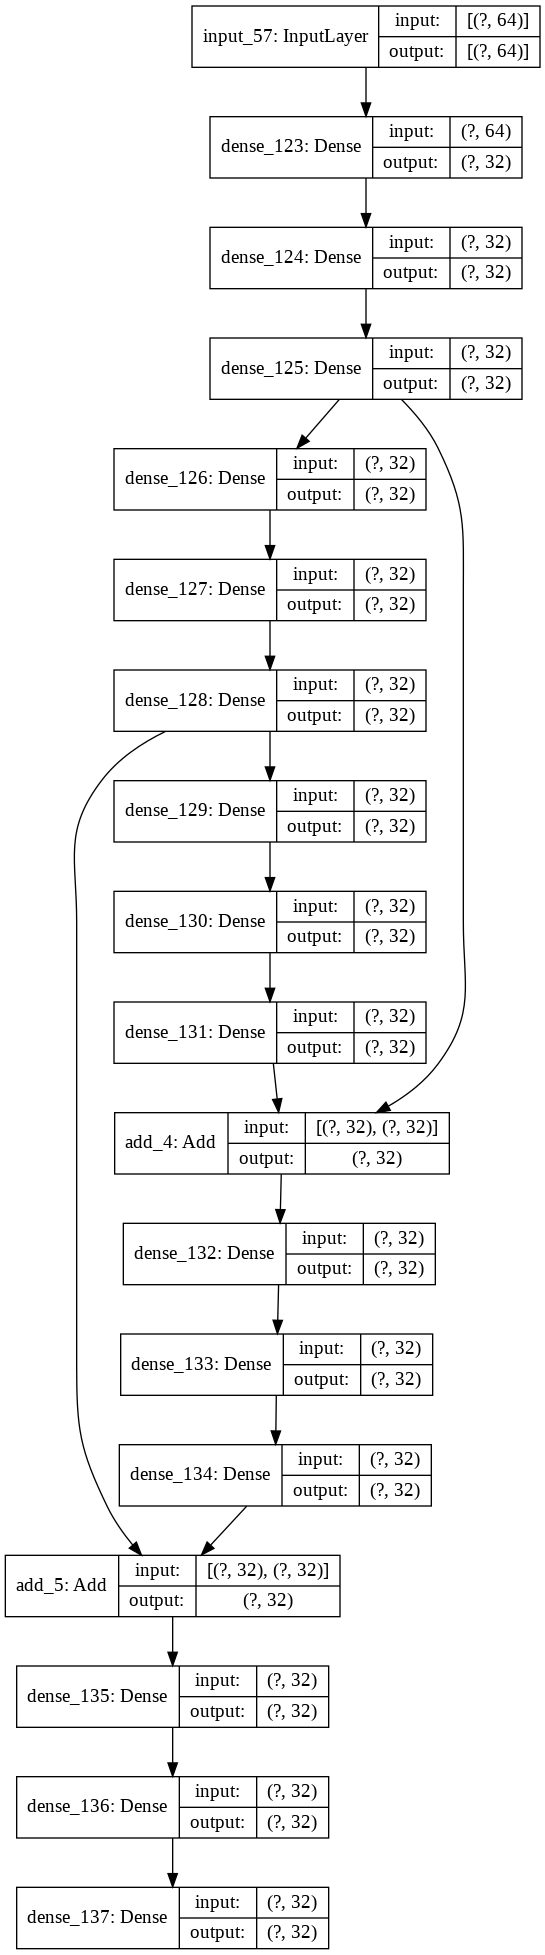

In [60]:
tf.keras.utils.plot_model(wow_model, to_file="a-complex-model.png", show_shapes=True)

In [4]:
#testing embedded layer
text_input = tf.keras.Input(shape=(None,))
x = tf.keras.layers.Embedding(3, 10)(text_input)
text_model = tf.keras.Model(text_input, x)
text_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding_2 (Embedding)      (None, None, 10)          30        
Total params: 30
Trainable params: 30
Non-trainable params: 0
_________________________________________________________________


In [29]:
last_frame = tf.keras.Input(shape=(128,128,3))
img_input_original = tf.keras.Input(shape=(128,128,3))
img_input_small = tf.keras.Input(shape=(64,64,3))

x = tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation="relu")(last_frame)
x = tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation="relu")(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(x)
x = tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu")(x)
x = tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu")(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(x)
x = tf.keras.layers.Conv2D(filters=64, kernel_size=(5,5), activation="relu")(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(x)
big_conv_output = tf.keras.layers.Flatten()(x)

Big_conv_last_frame = tf.keras.Model(last_frame, big_conv_output)

x = tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation="relu")(img_input)
x = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(x)
x = tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu")(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(x)
x = tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu")(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(x)
x = tf.keras.layers.UpSampling2D(size=(2,2))(x)

small_conv_output = tf.keras.layers.Flatten()(x)

Small_conv = tf.keras.Model(img_input, small_conv_output)

flatten_input = tf.keras.Input(shape=(9216,))
x = tf.keras.layers.Dense(units=128, activation="relu")(flatten_input)
x = tf.keras.layers.Dropout(rate=0.5)(x)
x = tf.keras.layers.Dense(units=32, activation="relu")(x)
prediction_output = tf.keras.layers.Dense(units=1, activation="sigmoid")(x)

FC_MODEL = tf.keras.Model(flatten_input, prediction_output)


In [42]:
Big_conv_last_frame.trainable = False
FC_MODEL.trainable = False

last_frame = tf.keras.Input(shape=(128,128,3), name="last_frame")
img_input_original = tf.keras.Input(shape=(128,128,3), name="img_input_original")
img_input_small = tf.keras.Input(shape=(64,64,3), name="img_input_downsize")

last_frame_conv_output = Big_conv_last_frame(last_frame)
this_frame_conv_output = Big_conv_last_frame(img_input_original)

small_conv_output = Small_conv(img_input_small)

#dummy test
converge_input = tf.keras.layers.add([last_frame_conv_output,small_conv_output])
middle_output = tf.keras.layers.Subtract()([this_frame_conv_output, converge_input])

final_result = FC_MODEL(converge_input)

dummy_test = tf.keras.Model(inputs=[last_frame, img_input_original, img_input_small], 
                            outputs=[middle_output, final_result])

#####



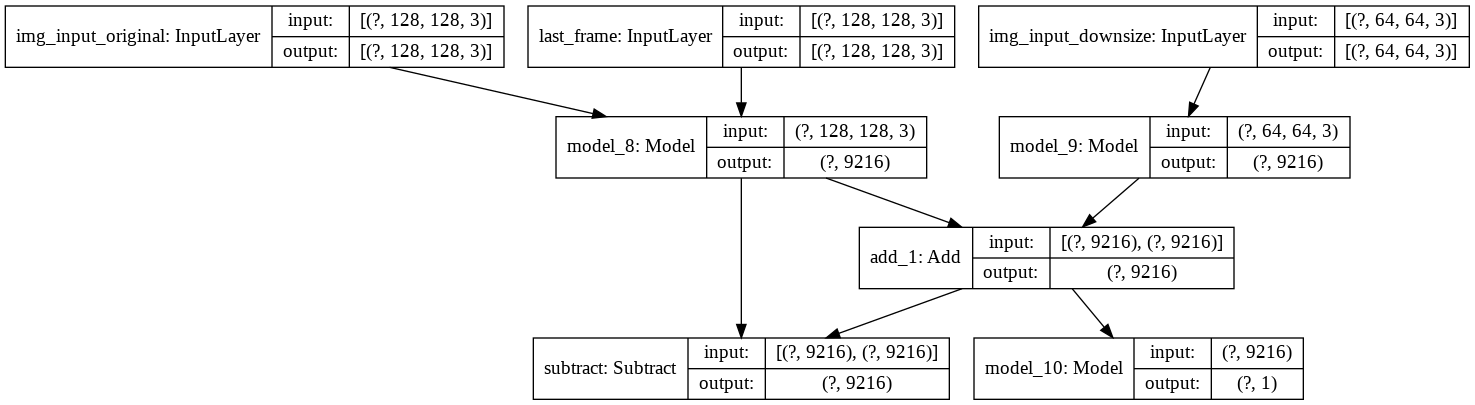

In [36]:
tf.keras.utils.plot_model(dummy_test, show_shapes=True)

In [47]:
dummy_test.summary()

Model: "model_14"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img_input_original (InputLayer) [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
last_frame (InputLayer)         [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
img_input_downsize (InputLayer) [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
model_8 (Model)                 (None, 9216)         67920       last_frame[0][0]                 
                                                                 img_input_original[0][0]  

In [43]:
dummy_test.summary()

Model: "model_14"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img_input_original (InputLayer) [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
last_frame (InputLayer)         [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
img_input_downsize (InputLayer) [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
model_8 (Model)                 (None, 9216)         67920       last_frame[0][0]                 
                                                                 img_input_original[0][0]  

In [46]:
dummy_test.compile()
tf.keras.utils.plot_model(dummy_test, show_shapes=True)

AttributeError: ignored